In [15]:
#### Synthea Health: Data Analysis and Insights Generation

In [16]:
!pip install -r requirements.txt

In [17]:
#import the required funcions and packages for EDA

import pandas as pd
from utils.utils import read_data_parse_dates,get_demographic_plot
import json
import plotly.express as px

In [18]:
config_file_path = './config/config.json'

# Load the JSON file
with open(config_file_path, 'r') as file:
    config = json.load(file)

# Access the value of 'input_folder'
output_folder = config.get('cleaned_data_path')
print("output Folder:", output_folder)

output Folder: C://Users//veena.vemula//Documents//GitHub//SDE-Skills-Test//Output


In [19]:
df_phr =  read_data_parse_dates(output_folder,"diagnosis_data",["BIRTHDATE"])


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_phr.head(5)

,START_DIAG,STOP_DIAG,PATIENT_ID,ENCOUNTER,CODE,DESCRIPTION,BIRTHDATE,DEATHDATE,SSN,DRIVERS,...,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,age_group,age_diag
0,2013-06-24,2013-07-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,10509002,Acute bronchitis (disorder),2005-07-04,NaN,999-49-3323,S99941126,...,Massachusetts,Norfolk County,NaN,42.035213,-71.482519,402723.415,14064.135,19.430137,10-19,8
1,2016-02-27,2016-03-14,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,a6d818dd-0983-fd1c-eefa-3d2295532c45,283371005,Laceration of forearm,2005-07-04,NaN,999-49-3323,S99941126,...,Massachusetts,Norfolk County,NaN,42.035213,-71.482519,402723.415,14064.135,19.430137,10-19,11
2,2016-08-11,2016-08-22,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,36d2e781-4655-0a11-1f70-c69856e02019,444814009,Viral sinusitis (disorder),2005-07-04,NaN,999-49-3323,S99941126,...,Massachusetts,Norfolk County,NaN,42.035213,-71.482519,402723.415,14064.135,19.430137,10-19,11
3,2016-11-27,2016-12-17,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,c8eaaf41-958b-31ab-7de5-568cee8751f3,444814009,Viral sinusitis (disorder),2005-07-04,NaN,999-49-3323,S99941126,...,Massachusetts,Norfolk County,NaN,42.035213,-71.482519,402723.415,14064.135,19.430137,10-19,11
4,2017-02-22,2017-06-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,16114001,Fracture of ankle,2005-07-04,NaN,999-49-3323,S99941126,...,Massachusetts,Norfolk County,NaN,42.035213,-71.482519,402723.415,14064.135,19.430137,10-19,12


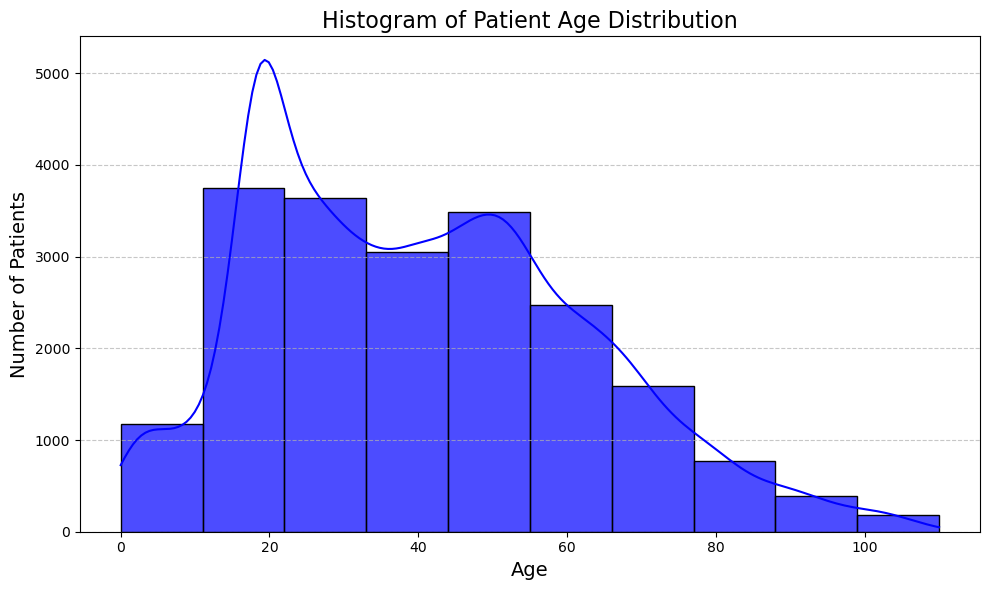

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_phr['age_diag'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of Patient Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
patient_counts_by_diagnosis = df_phr.groupby('DESCRIPTION')['PATIENT_ID'].nunique()
patient_counts_sorted = patient_counts_by_diagnosis.sort_values(ascending=False)

print(patient_counts_sorted.head(30))


DESCRIPTION
Stress (finding)                                    894
Viral sinusitis (disorder)                          739
Limited social contact (finding)                    661
Social isolation (finding)                          653
Acute viral pharyngitis (disorder)                  506
Not in labor force (finding)                        501
Victim of intimate partner abuse (finding)          466
Body mass index 30+ - obesity (finding)             463
Acute bronchitis (disorder)                         454
Prediabetes                                         341
Anemia (disorder)                                   324
Hypertension                                        292
Risk activity involvement (finding)                 289
Normal pregnancy                                    217
Chronic sinusitis (disorder)                        216
Has a criminal record (finding)                     206
Miscarriage in first trimester                      204
Chronic low back pain (finding)     

In [43]:
top_15_diagnoses = df_phr.groupby('DESCRIPTION').size().sort_values(ascending = False).head(15)
# Replace diagnoses not in top 15 with "Others"
GroupedDiagnosis = df_phr['DESCRIPTION'].apply(
    lambda x: x if x in top_15_diagnoses else 'Others'
)
GroupedDiagnosis.value_counts()

DESCRIPTION
Others                                        5994
Stress (finding)                              5137
Social isolation (finding)                    1243
Viral sinusitis (disorder)                    1233
Limited social contact (finding)              1200
Not in labor force (finding)                  1077
Victim of intimate partner abuse (finding)     819
Acute viral pharyngitis (disorder)             678
Acute bronchitis (disorder)                    571
Normal pregnancy                               527
Body mass index 30+ - obesity (finding)        463
Risk activity involvement (finding)            392
Prediabetes                                    341
Anemia (disorder)                              324
Hypertension                                   292
Chronic sinusitis (disorder)                   219
Name: count, dtype: int64

C:\Users\veena.vemula\AppData\Local\Temp\ipykernel_8680\1839777875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_diagnoses.values, y=top_15_diagnoses.index, palette='viridis')


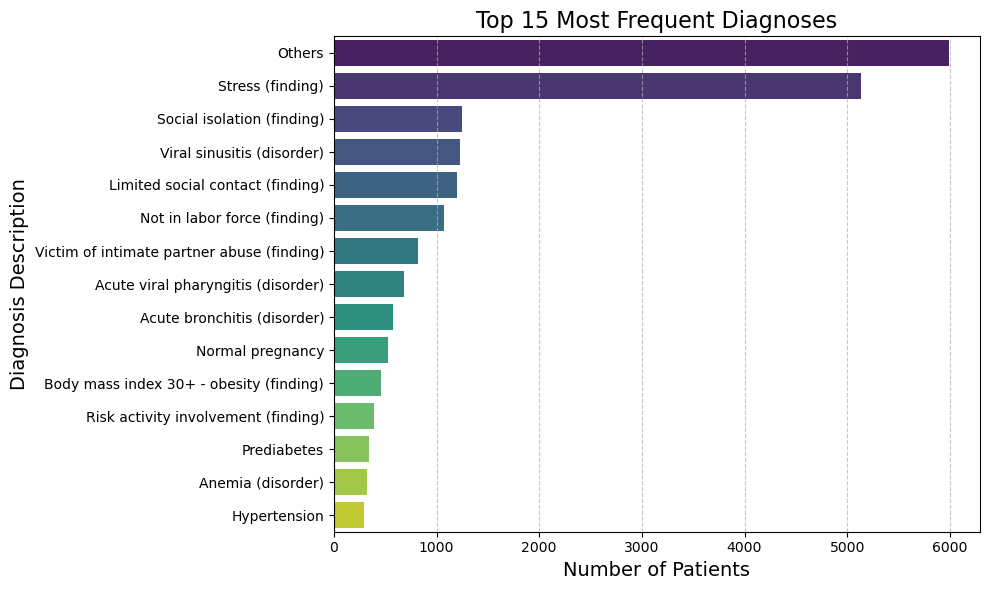

In [45]:
top_15_diagnoses = GroupedDiagnosis.value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_diagnoses.values, y=top_15_diagnoses.index, palette='viridis')

plt.title('Top 15 Most Frequent Diagnoses', fontsize=16)
plt.xlabel('Number of Patients', fontsize=14)
plt.ylabel('Diagnosis Description', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
